# Importing of Libraries

In [150]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler 

In [151]:
  df = pd.read_csv('healthcare-dataset-stroke-data.csv')
  #https://www.kaggle.com/fedesoriano/stroke-prediction-dataset

# Insights

In [152]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [153]:
df.shape

(5110, 12)

In [154]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


# Missing data management

In [155]:
df.isnull().sum()/len(df)*100

id                   0.000000
gender               0.000000
age                  0.000000
hypertension         0.000000
heart_disease        0.000000
ever_married         0.000000
work_type            0.000000
Residence_type       0.000000
avg_glucose_level    0.000000
bmi                  3.933464
smoking_status       0.000000
stroke               0.000000
dtype: float64

In [156]:
df[df['stroke']==1]['bmi'].isnull().sum()

40

In [157]:
print(str(round(df[df['stroke']==1]['bmi'].isnull().sum()/len(df[df['stroke']==1])*100,2)),'%')

16.06 %


In [158]:
print('Average mean:', np.mean(df['bmi']), '\n')
df["bmi"] = df["bmi"].fillna(np.mean(df['bmi']))
df.isnull().sum()

Average mean: 28.893236911794673 



id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [159]:
df['smoking_status'].replace('Unknown', np.nan, inplace=True)
df['smoking_status'].fillna(df['smoking_status'].mode()[0], inplace = True)
df['smoking_status'].value_counts()


never smoked       3436
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64

In [160]:
df.drop('id', axis=1, inplace=True)### nije nam potreban uopste

# Categorical attributes

In [161]:
categorical = df[['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status', 'stroke']]
for i in range(len(categorical.columns)):
  print(str(categorical[categorical.columns[i]].value_counts()),'\n')

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64 

0    4612
1     498
Name: hypertension, dtype: int64 

0    4834
1     276
Name: heart_disease, dtype: int64 

Yes    3353
No     1757
Name: ever_married, dtype: int64 

Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64 

Urban    2596
Rural    2514
Name: Residence_type, dtype: int64 

never smoked       3436
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64 

0    4861
1     249
Name: stroke, dtype: int64 



# Numerical attributes

In [162]:
numerical = df[['age', 'avg_glucose_level', 'bmi', 'hypertension', 'heart_disease', 'stroke']] # za numericke
numerical.describe()

,age,avg_glucose_level,bmi,hypertension,heart_disease,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,43.226614,106.147677,28.893237,0.097456,0.054012,0.048728
std,22.612647,45.283560,7.698018,0.296607,0.226063,0.215320
min,0.080000,55.120000,10.300000,0.000000,0.000000,0.000000
25%,25.000000,77.245000,23.800000,0.000000,0.000000,0.000000
50%,45.000000,91.885000,28.400000,0.000000,0.000000,0.000000
75%,61.000000,114.090000,32.800000,0.000000,0.000000,0.000000
max,82.000000,271.740000,97.600000,1.000000,1.000000,1.000000


# Graphic view

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f97794f7390>,
      dtype=object)

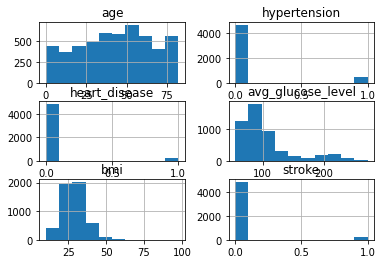

In [163]:
df.hist()

In [164]:
print((df['stroke'] == 1).sum()) ### koliko ih ima
## koliko ih ima procentualno
print(str(round((df['stroke'] == 1).sum()/len(df)*100,2)),'%')


249
4.87 %


Text(0.5, 1.0, 'MOŽDANI UDAR')

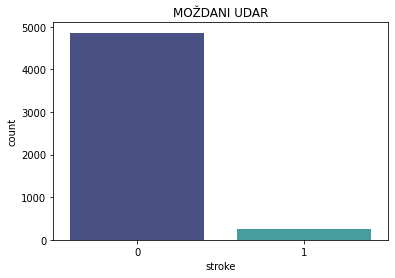

In [165]:
sns.countplot(data = df, x ='stroke', palette='mako')

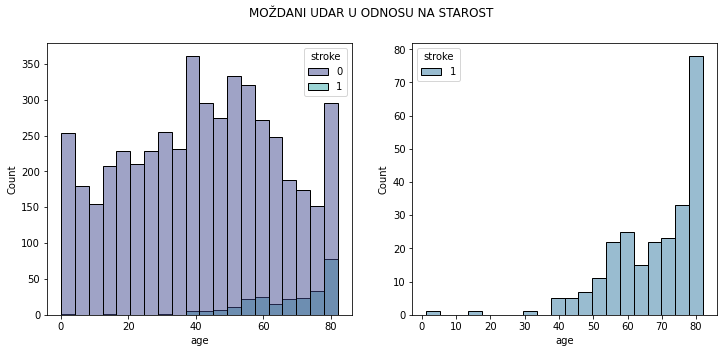

In [166]:
fig, ax =plt.subplots(1,2,figsize=(12,5))
sns.histplot(data = df, x='age', hue='stroke', palette='mako',bins=20, ax=ax[0])
sns.histplot(data = df[df['stroke'] == 1], x='age', hue='stroke', palette='mako', bins=20, ax=ax[1])
fig.show()

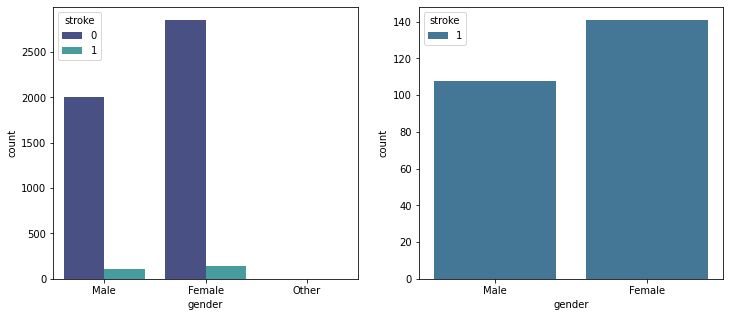

In [167]:
fig, ax =plt.subplots(1,2,figsize=(12,5))
sns.countplot(data = df, x='gender', hue='stroke', palette='mako', ax=ax[0])
sns.countplot(data = df[df['stroke'] == 1], x='gender', hue='stroke', palette='mako',ax=ax[1])
fig.show()

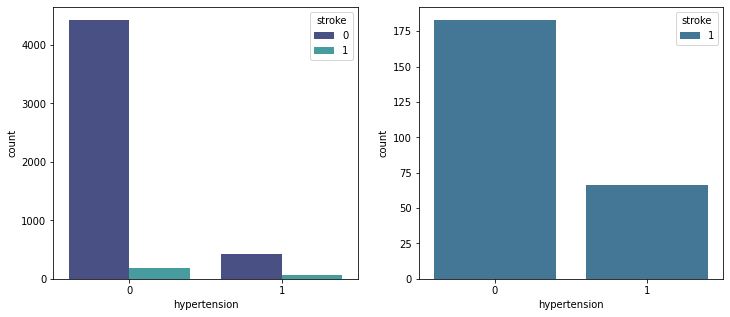

In [168]:
fig, ax =plt.subplots(1,2,figsize=(12,5))
sns.countplot(data = df, x='hypertension', hue='stroke', palette='mako', ax=ax[0])
sns.countplot(data = df[df['stroke'] == 1], x='hypertension', hue='stroke', palette='mako',ax=ax[1])
fig.show()

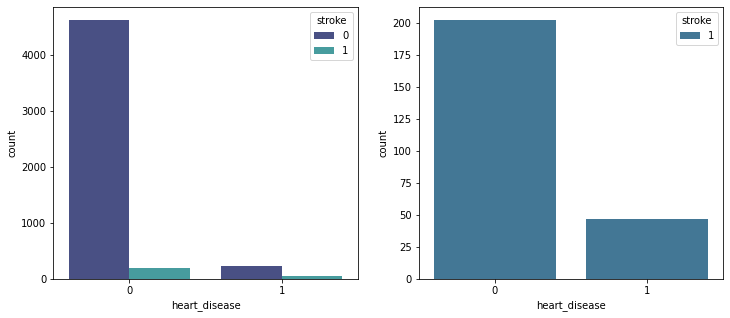

In [169]:
fig, ax =plt.subplots(1,2,figsize=(12,5))

sns.countplot(data = df, x='heart_disease', hue='stroke', palette='mako', ax=ax[0])
sns.countplot(data = df[df['stroke'] == 1], x='heart_disease', hue='stroke', palette='mako',ax=ax[1])
fig.show()

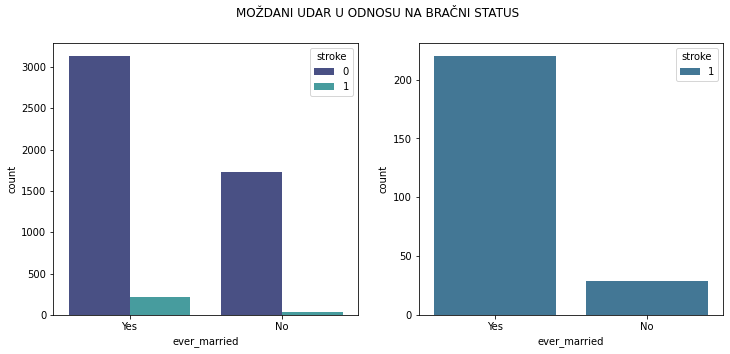

In [170]:
fig, ax =plt.subplots(1,2,figsize=(12,5))
sns.countplot(data = df, x='ever_married', hue='stroke', palette='mako', ax=ax[0])
sns.countplot(data = df[df['stroke'] == 1], x='ever_married', hue='stroke', palette='mako',ax=ax[1])
fig.show()

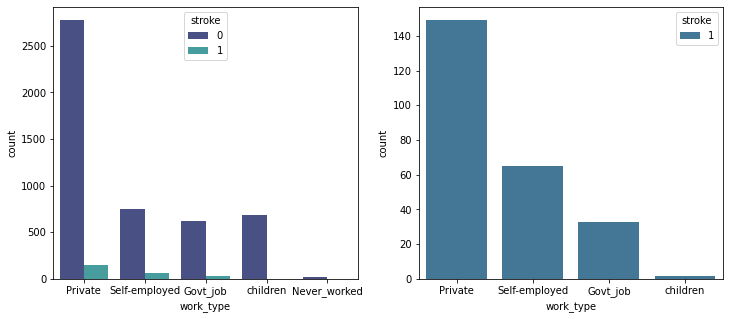

In [171]:
fig, ax =plt.subplots(1,2,figsize=(12,5))
sns.countplot(data = df, x='work_type', hue='stroke', palette='mako', ax=ax[0])
sns.countplot(data = df[df['stroke'] == 1], x='work_type', hue='stroke', palette='mako',ax=ax[1])
fig.show()

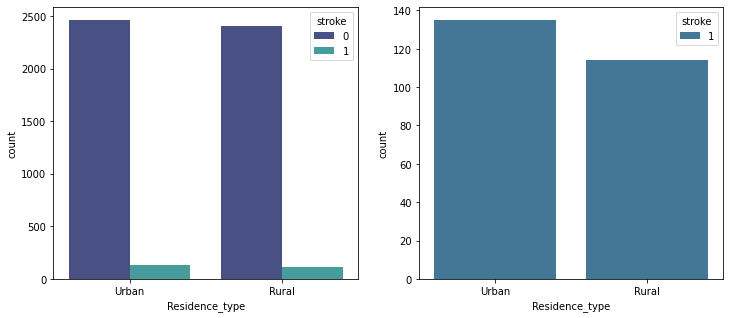

In [172]:
fig, ax =plt.subplots(1,2,figsize=(12,5))
sns.countplot(data = df, x='Residence_type', hue='stroke', palette='mako', ax=ax[0])
sns.countplot(data = df[df['stroke'] == 1], x='Residence_type', hue='stroke', palette='mako',ax=ax[1])
fig.show()

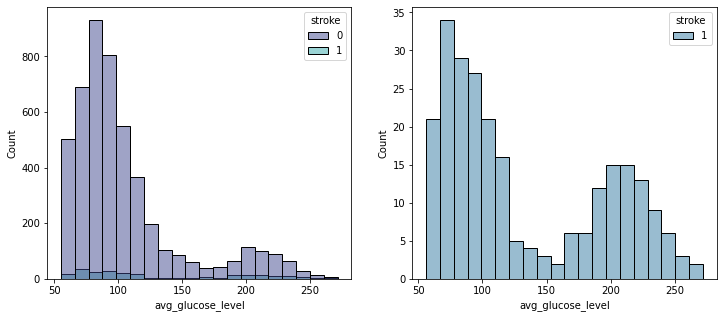

In [173]:
fig, ax =plt.subplots(1,2,figsize=(12,5))
sns.histplot(data = df, x='avg_glucose_level', hue='stroke', palette='mako', bins=20, ax=ax[0])
sns.histplot(data = df[df['stroke'] == 1], x='avg_glucose_level', hue='stroke', palette='mako', bins=20, ax=ax[1])
fig.show()

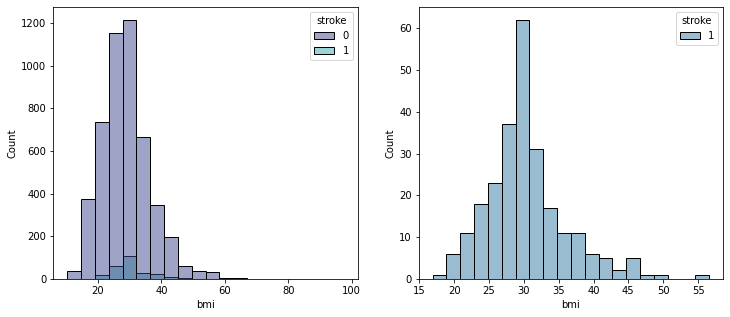

In [174]:
fig, ax =plt.subplots(1,2,figsize=(12,5))
sns.histplot(data = df, x='bmi', hue='stroke', palette='mako', bins=20, ax=ax[0])
sns.histplot(data = df[df['stroke'] == 1], x='bmi', hue='stroke', palette='mako', bins=20, ax=ax[1])
fig.show()

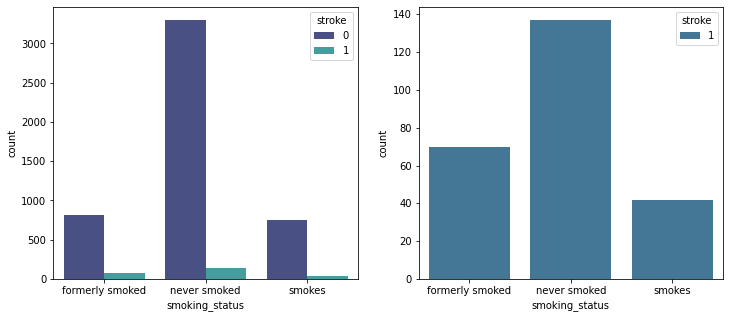

In [175]:
fig, ax =plt.subplots(1,2,figsize=(12,5))
sns.countplot(data = df, x='smoking_status', hue='stroke', palette='mako', ax=ax[0])
sns.countplot(data = df[df['stroke'] == 1], x='smoking_status', hue='stroke', palette='mako', ax=ax[1])
fig.show()

# Transformation of categorical attributes into numerical

In [176]:
  df_new = pd.get_dummies(df, prefix=['gender','ever_married', 'work_type', 'Residence_type', 'smoking_status' ], columns=['gender','ever_married', 'work_type', 'Residence_type', 'smoking_status' ])

In [177]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   age                             5110 non-null   float64
 1   hypertension                    5110 non-null   int64  
 2   heart_disease                   5110 non-null   int64  
 3   avg_glucose_level               5110 non-null   float64
 4   bmi                             5110 non-null   float64
 5   stroke                          5110 non-null   int64  
 6   gender_Female                   5110 non-null   uint8  
 7   gender_Male                     5110 non-null   uint8  
 8   gender_Other                    5110 non-null   uint8  
 9   ever_married_No                 5110 non-null   uint8  
 10  ever_married_Yes                5110 non-null   uint8  
 11  work_type_Govt_job              5110 non-null   uint8  
 12  work_type_Never_worked          51

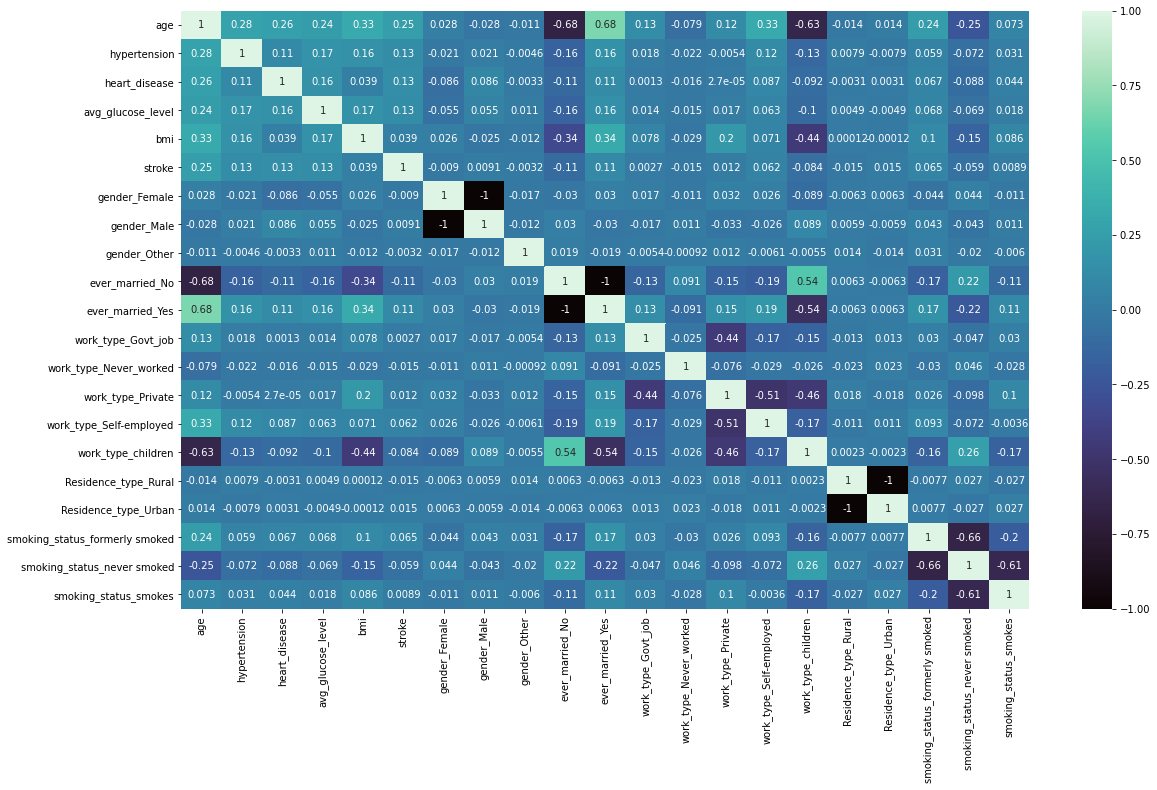

In [178]:
corr = df_new.corr()
plt.figure(figsize=(19,11))
ax = sns.heatmap(corr,annot=True,cmap='mako')

In [179]:
corr.sort_values(by='stroke', ascending=False)['stroke']

stroke                            1.000000
age                               0.245257
heart_disease                     0.134914
avg_glucose_level                 0.131945
hypertension                      0.127904
ever_married_Yes                  0.108340
smoking_status_formerly smoked    0.064556
work_type_Self-employed           0.062168
bmi                               0.038947
Residence_type_Urban              0.015458
work_type_Private                 0.011888
gender_Male                       0.009117
smoking_status_smokes             0.008939
work_type_Govt_job                0.002677
gender_Other                     -0.003166
gender_Female                    -0.009027
work_type_Never_worked           -0.014882
Residence_type_Rural             -0.015458
smoking_status_never smoked      -0.058931
work_type_children               -0.083869
ever_married_No                  -0.108340
Name: stroke, dtype: float64

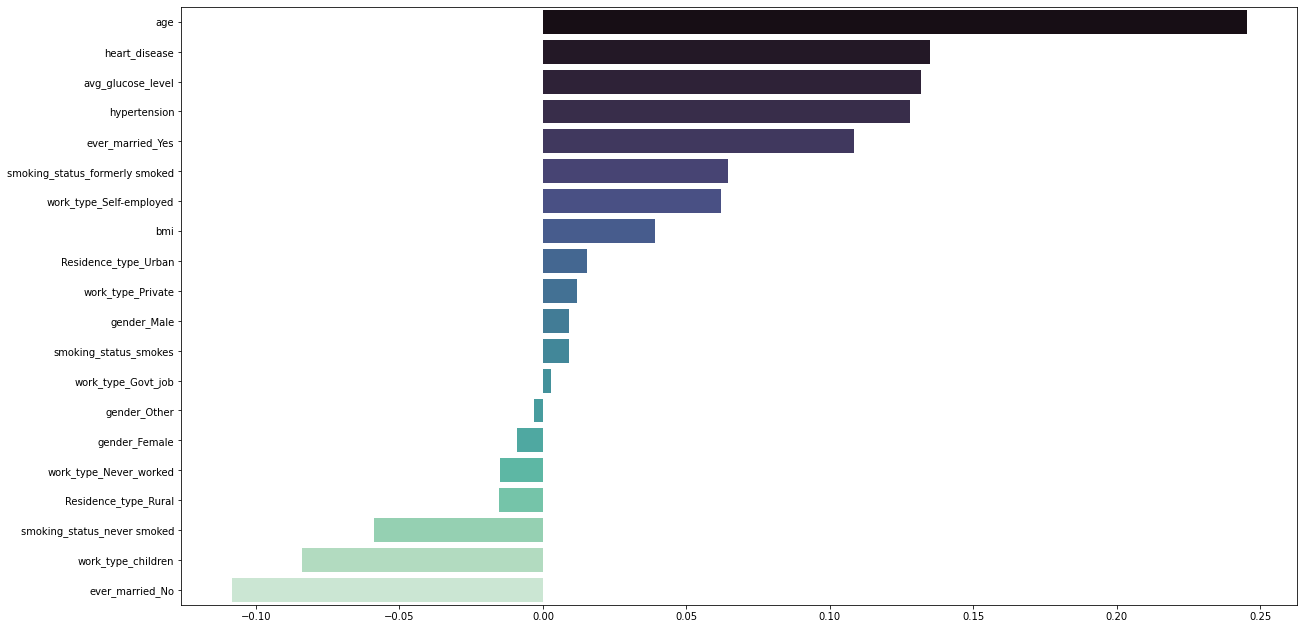

In [180]:
a = corr.sort_values(by='stroke', ascending=False)['stroke']
plt.figure(figsize=(20,11))
ax = sns.barplot(x=a[1:].values, y=a[1:].index, palette='mako')### kao vidimo sta i kako utice##bez ovog glavnog

# Dataset balancing

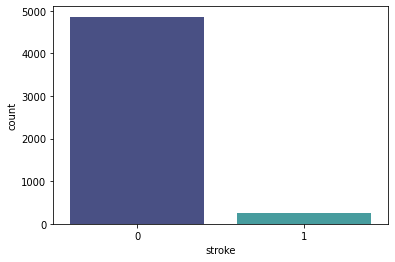

In [181]:
sns.countplot(data = df_new, x='stroke', palette='mako')

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


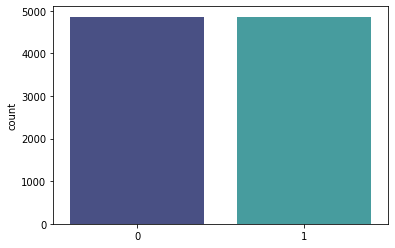

In [182]:
smote = SMOTE(random_state = 107)

features = df_new.drop('stroke', axis = 1)
target = df_new['stroke']
X_smote, Y_smote = smote.fit_resample(features,target)

sns.countplot(Y_smote, palette='mako')

# Train and test data split

In [187]:
y = Y_smote
x = X_smote
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.2)

# Scaling data

In [188]:
scaler = StandardScaler()
scaler.fit(x_train)
x_train_scaled=(scaler.transform(x_train))

scaler.fit(x_test)
x_test_scaled=(scaler.transform(x_test))

# Algorithm

In [189]:
logit = LogisticRegression(max_iter=1000)
log_t = logit.fit(x_train_scaled, y_train)
score_log = cross_val_score(log_t, x_train_scaled, y_train, cv=50, scoring='accuracy')
np.mean(score_log)

0.7760115798180316

In [190]:
prediction_logistic = classification_report(log_t.predict(x_test_scaled), y_test)
print(prediction_logistic)

              precision    recall  f1-score   support

           0       0.76      0.80      0.78       919
           1       0.81      0.77      0.79      1026

    accuracy                           0.78      1945
   macro avg       0.78      0.78      0.78      1945
weighted avg       0.78      0.78      0.78      1945



In [123]:
print(confusion_matrix(y_test,logit.predict(x_test_scaled)))

[[713 231]
 [202 799]]


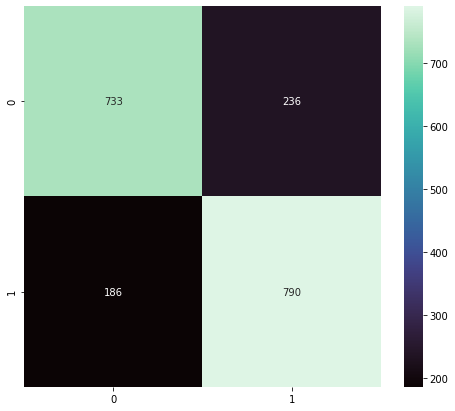

In [191]:
plt.figure(figsize=(8,7))
ax = sns.heatmap(confusion_matrix(y_test,logit.predict(x_test_scaled)),annot=True,cmap='mako',  fmt='g')

# Significant attributes

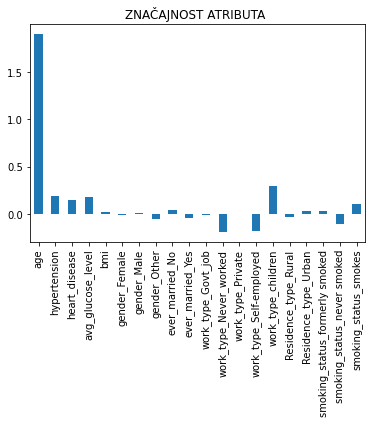

In [196]:
importance = logit.coef_
features.columns.values
importance.ravel()
dictionary = dict(zip(features.columns.values, importance.ravel()))
feature_df = pd.DataFrame(dictionary, index=[0])
feature_df.T.plot.bar(title = 'ZNAČAJNOST ATRIBUTA ', legend = False)